> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
import seaborn as sns
%matplotlib inline
np.random.seed(42)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
ford_data = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Well I don't think I am going to use the longitude nor the latitude in my analysis so i'm gonna drop those :)

In [3]:
ford_data.drop(columns = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis = 1, inplace = True)
ford_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


In [4]:
ford_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 11.9+ MB


In [5]:
ford_data.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year
count,183412.000000,183215.000000,183215.000000,183412.000000,175147.000000
mean,726.078435,138.590427,136.249123,4472.906375,1984.806437
std,1794.389780,111.778864,111.515131,1664.383394,10.116689
min,61.000000,3.000000,3.000000,11.000000,1878.000000
25%,325.000000,47.000000,44.000000,3777.000000,1980.000000
50%,514.000000,104.000000,100.000000,4958.000000,1987.000000
75%,796.000000,239.000000,235.000000,5502.000000,1992.000000
max,85444.000000,398.000000,398.000000,6645.000000,2001.000000


### There appear to be alot of missing values. However it's understandable since it's in the gender & age columns as many people prefer to not disclose their gender nor their age, so we're gonna just fill those with the mean for each column :)

In [6]:
ford_data['member_gender'].mode()

0    Male
dtype: object

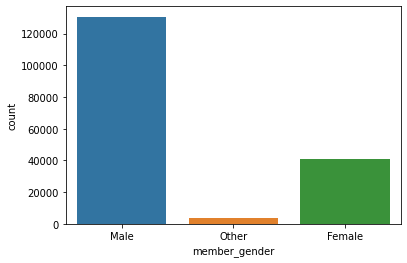

In [7]:
sns.countplot(data = ford_data, x = 'member_gender');

In [8]:
ford_data['member_gender'].fillna(str(ford_data['member_gender'].mode()).replace(str(ford_data['member_gender'].mode()), 'Male'), inplace = True)

In [9]:
ford_data['member_birth_year'].fillna(ford_data['member_birth_year'].mean().__round__(), inplace = True)

In [10]:
ford_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        183412 non-null  float64
 10  member_gender            183412 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 11.9+ MB


In [11]:
ford_data.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,1985.0,Male,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,49:58.6,19:51.8,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No
6,1147,55:35.1,14:42.6,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No
7,1615,41:06.8,08:02.8,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No
8,1570,41:48.8,07:59.7,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988.0,Other,No
9,1049,49:47.7,07:17.0,19.0,Post St at Kearny St,121.0,Mission Playground,6488,Subscriber,1992.0,Male,No


### There is just some missing id's so we're gonna drop those :)

In [12]:
ford_data.dropna(axis = 0, inplace = True)
ford_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183215 non-null  int64  
 1   start_time               183215 non-null  object 
 2   end_time                 183215 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183215 non-null  int64  
 8   user_type                183215 non-null  object 
 9   member_birth_year        183215 non-null  float64
 10  member_gender            183215 non-null  object 
 11  bike_share_for_all_trip  183215 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 13.3+ MB


## Now The data is nice and clean :D

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
### $What$ $are$ $the$ $stations$ $with$ $the$ $longest$ $duration$ $?$

In [13]:
ford_data['start_station_name'].groupby(ford_data['duration_sec']).max().tail(10)

duration_sec
80891    Civic Center/UN Plaza BART Station (Market St ...
81549                               Jersey St at Church St
82385                                Fell St at Stanyan St
82512                                 Myrtle St at Polk St
83195                          Bancroft Way at College Ave
83407                                 11th St at Natoma St
83519                                  Page St at Scott St
83772                                  Folsom St at 9th St
84548         Powell St BART Station (Market St at 4th St)
85444         Powell St BART Station (Market St at 5th St)
Name: start_station_name, dtype: object

In [14]:
ford_data['end_station_name'].groupby(ford_data['duration_sec']).max().tail(10)

duration_sec
80891                               Webster St at Grove St
81549                        Cesar Chavez St at Dolores St
82385                                Fell St at Stanyan St
82512    Civic Center/UN Plaza BART Station (Market St ...
83195                           Telegraph Ave at Ashby Ave
83407                                        16th St Depot
83519    San Francisco Public Library (Grove St at Hyde...
83772                                Hubbell St at 16th St
84548                                 Myrtle St at Polk St
85444                               Valencia St at 16th St
Name: end_station_name, dtype: object

### It appears from the previous tables that the longest recorded trips were between Powell St BART Station & both of (Myrtle St at Polk St &  Valencia St at 16th St)

### Research Question 2
### $Does$ $the$ $user's$ $Gender$ $affect$ $duration$ $of$ $the$ $trip$ $?$

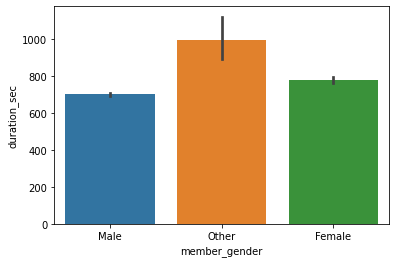

In [24]:
sns.barplot(data = ford_data, x = 'member_gender', y = 'duration_sec');

### Research Question 3
### $Does$ $the$ $user's$ $type$ ($Either$ $'Customer'$ $or$ $'Subescriber'$) $affect$ $the$ $duration$ $of$ $the$ $trip$ $?$

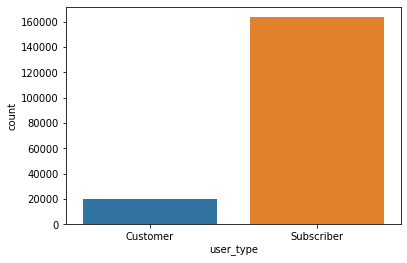

In [18]:
sns.countplot(data = ford_data, x = 'user_type');

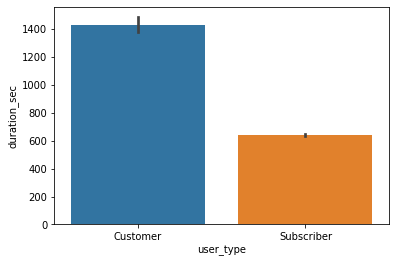

In [25]:
sns.barplot(data = ford_data, x = 'user_type', y = 'duration_sec');

<a id='conclusions'></a>
## Conclusions


**Answer Goes Here**